# Reproducing Figure 1

In [1]:
###################
# Import packages #
###################

import numpy as np
from scipy.special import gammainc
from scipy import interpolate

In [2]:
##############################
# Things related to plotting #
##############################

import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"]="Times New Roman"
rc_fonts = {
"text.usetex": True,
}
plt.rcParams.update(rc_fonts)
plt.rcParams["figure.figsize"] = (8,6) 

import seaborn as sns
my_palette = sns.color_palette("colorblind")

## Figure 1 - Left

In [3]:
rateData_MD = np.load('../data/delayedRateDataMD.npy', allow_pickle=True)[()]
formationRates_MD = rateData_MD['formationRates']
tdelays_MD = rateData_MD['tds']
zformation_MD = rateData_MD['zs']

In [4]:
dz = 0.01
zs = np.arange(0.,10.0,dz) # NOTE: should be same array as what was used to make the delayedRateDataMD.npy file

def R_norm_MD(zs, metMin_td, lambda_td):
    fs = gammainc(0.84,(metMin_td**2.)*np.power(10.,0.3*zformation_MD))[...,None]
    weightedFormationRates_MD = formationRates_MD*fs

    dpdt = np.power(tdelays_MD,lambda_td)
    dpdt[tdelays_MD<0.05] = 0.
    dpdt[tdelays_MD>13.5] = 0.
    mergerRate_MD = weightedFormationRates_MD.dot(dpdt)

    R = mergerRate_MD
    f = interpolate.interp1d(zs, R)
    norm = f(0.2)
    return R, norm

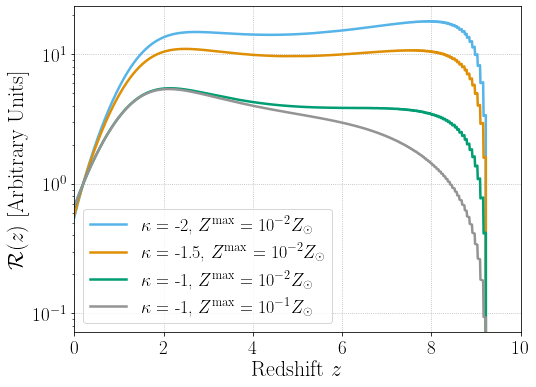

In [7]:
plt.plot(zs, R_norm_MD(zs,1e-2,-2)[0]/R_norm_MD(zs,1e-2,-2)[1], label="$\kappa$ = -2, $Z^{\\rm max}=10^{-2}Z_\odot$", c = my_palette[-1],lw=2.5)
plt.plot(zs, R_norm_MD(zs,1e-2,-1.5)[0]/R_norm_MD(zs,1e-2,-1.5)[1], label="$\kappa$ = -1.5, $Z^{\\rm max}=10^{-2}Z_\odot$", c = my_palette[1],lw=2.5)
plt.plot(zs, R_norm_MD(zs,1e-2,-1)[0]/R_norm_MD(zs,1e-2,-1)[1], label="$\kappa$ = -1, $Z^{\\rm max}=10^{-2}Z_\odot$", c = my_palette[2],lw=2.5)
plt.plot(zs, R_norm_MD(zs,1e-1,-1)[0]/R_norm_MD(zs,1e-1,-1)[1], label="$\kappa$ = -1, $Z^{\\rm max}=10^{-1}Z_\odot$", c = my_palette[-3],lw=2.5)
plt.yscale('log')
plt.xlabel('Redshift $z$', fontsize=22)
plt.legend(fontsize=18)
plt.xlim(0,10)
plt.xticks(fontsize=19)
plt.yticks(fontsize=19)
plt.ylabel('$\mathcal{R}(z)$ [Arbitrary Units]', fontsize=22)
plt.grid(visible=True, ls='dotted')
plt.show()

## Figure 1 - Right